<div align="center">

# <span style="font-size: 2em;">Welcome Decision Trees!</span>

</div>

<p align="center">
  <img src="DT.png" alt="Header" />
</p>

<div align="center">

# <span style="font-size: em;">The Details!</span>

</div>

Decision Trees (DTs) are a popular supervised learning method for both classification and regression. They aim to build a model that predicts a target's value by learning simple decision rules from data features, essentially creating a step-by-step flowchart.

Why are they popular? Decision trees are often chosen for predictive modeling because they're relatively easy to grasp and can be quite effective. The core idea is to divide a dataset into smaller, more manageable segments based on feature values. Prediction happens in two main phases: first, training the model by building and refining the tree with existing data, and second, using the trained tree to predict outcomes for new, unseen data.

Structurally, decision trees are simple, composed of just two main elements: **nodes** and **branches** that connect them.


The nodes include:

* **Root Node:** The starting point of the tree, representing the entire dataset.
* **Decision Nodes:** Points where the data is split based on a feature's value. These have arrows coming in and going out.
* **Leaf Nodes:** The endpoints of the tree, where a final prediction (a class label or a value) is made. These only have arrows pointing to them.





In [86]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

try:
    df = pd.read_csv("Cancer_data.csv")
    print("Loaded Cancer_data.csv")
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

df["diagnosis"].unique()

df =df.drop(columns = ['Unnamed: 32'])

Loaded Cancer_data.csv


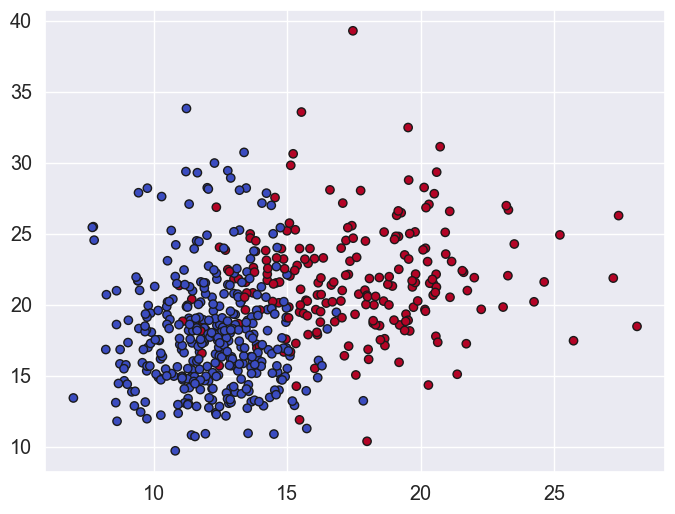

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df['radius_mean'], 
    df['texture_mean'], 
    c=(df['diagnosis'] == 'M'), 
    cmap='coolwarm', 
    edgecolor='k'
)


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
model_encoder = LabelEncoder()

X =df.drop(columns = ["diagnosis"])
y = df["diagnosis"]
y = model_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train_plot = X_train[['radius_mean', 'texture_mean']].values
X_val_plot = X_val[['radius_mean', 'texture_mean']].values

#scaler = StandardScaler()
#X_train_plot_scaled = scaler.fit_transform(X_train_plot)
#X_val_plot_scaled = scaler.transform(X_val_plot)

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train_plot, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- radius_mean <= 15.03
|   |--- texture_mean <= 19.61
|   |   |--- radius_mean <= 14.86
|   |   |   |--- texture_mean <= 18.64
|   |   |   |   |--- radius_mean <= 11.75
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- radius_mean >  11.75
|   |   |   |   |   |--- radius_mean <= 11.83
|   |   |   |   |   |   |--- radius_mean <= 11.78
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- radius_mean >  11.78
|   |   |   |   |   |   |   |--- texture_mean <= 16.92
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- texture_mean >  16.92
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- radius_mean >  11.83
|   |   |   |   |   |   |--- texture_mean <= 15.45
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- texture_mean >  15.45
|   |   |   |   |   |   |   |--- texture_mean <= 15.58
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- texture_mean >  15.58
|   |   |   |   

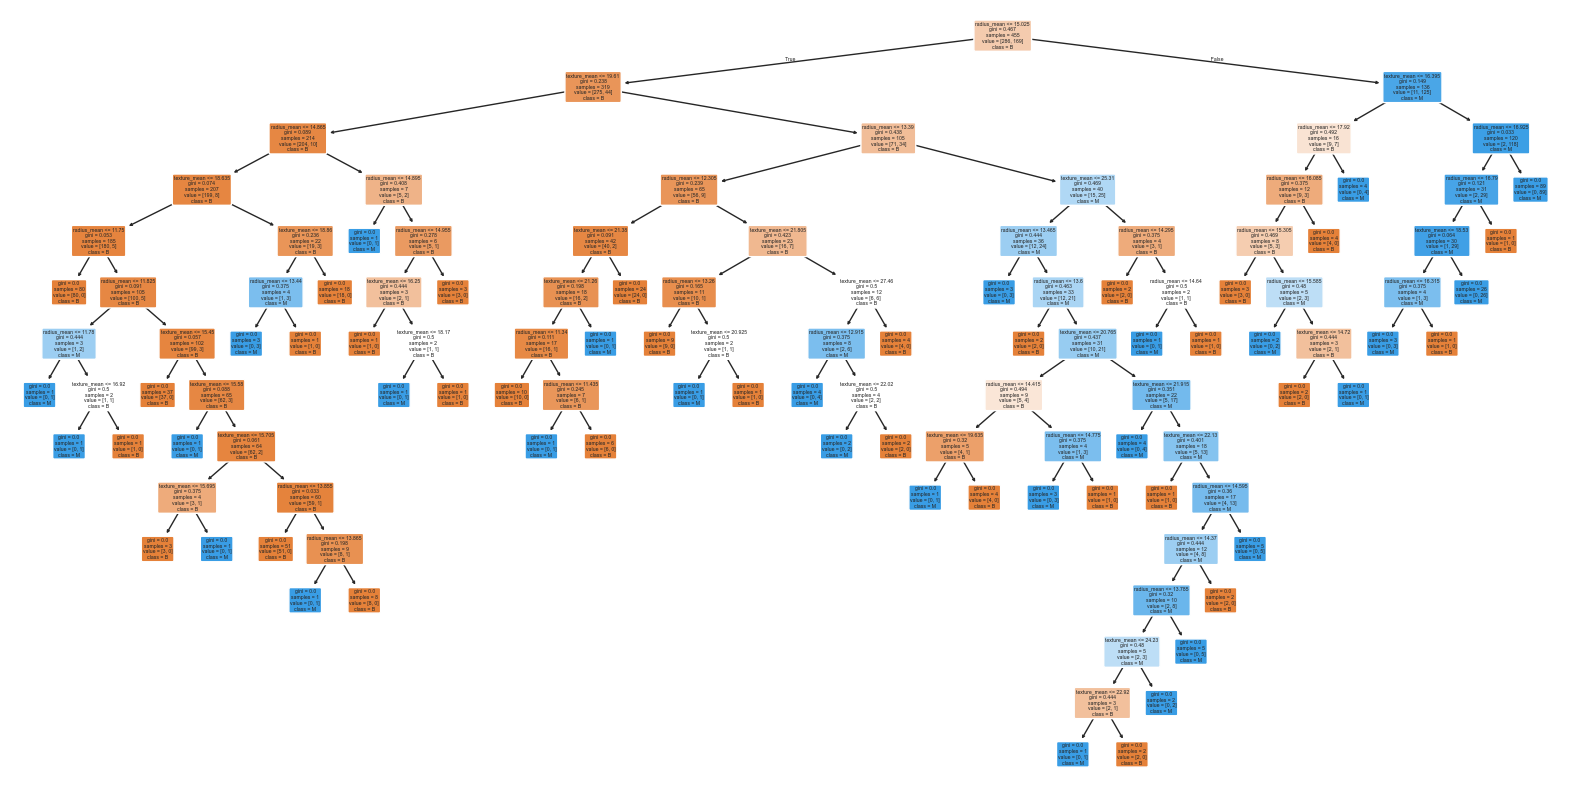

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

"""
Visualizes a trained scikit-learn Decision Tree model by printing its
textual rules and displaying a graphical representation.

This code snippet assumes the following variables are pre-defined:
    - `decision_tree`: A trained scikit-learn DecisionTreeClassifier object.
    - `model_encoder`: A fitted scikit-learn LabelEncoder object from which
                       `model_encoder.classes_` can be used to get the
                       class names for the plot.
    - `plt`: The matplotlib.pyplot module, imported as `plt`.

The snippet performs two main actions:

1.  **Prints Textual Rules:**
    It uses `sklearn.tree.export_text` to generate a textual representation
    of the decision tree's rules. The `feature_names` are explicitly set to
    `['radius_mean', 'texture_mean']`. These rules are then printed to the
    standard output.

2.  **Displays Tree Plot:**
    It uses `sklearn.tree.plot_tree` to create a graphical visualization
    of the decision tree.
    - A matplotlib figure is created with a size of (20, 10) inches.
    - The tree is plotted with specified `feature_names`
      (`['radius_mean', 'texture_mean']`), `class_names` (derived from
      `model_encoder.classes_`), and visual enhancements (`filled=True`,
      `rounded=True`).
    - The plot is then displayed using `plt.show()`.

Key parameters implicitly used by the snippet:
    - Model: `decision_tree` (the trained tree)
    - Feature Names for Rules & Plot: `['radius_mean', 'texture_mean']`
    - Class Names for Plot: `model_encoder.classes_`
    - Figure Size for Plot: `(20, 10)`
"""


tree_rules = export_text(decision_tree, feature_names=['radius_mean', 'texture_mean'])
print(tree_rules)


plt.figure(figsize=(20, 10))  
plot_tree(decision_tree, 
          feature_names=['radius_mean', 'texture_mean'], 
          class_names=model_encoder.classes_, 
          filled=True, 
          rounded=True)
plt.show()


Validation Accuracy: 0.8772


/var/folders/cd/4whv_gr91kld7sk4xncs1fhm0000gn/T/ipykernel_37094/2781152616.py:5: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y_val = y_val.astype(np.integer)


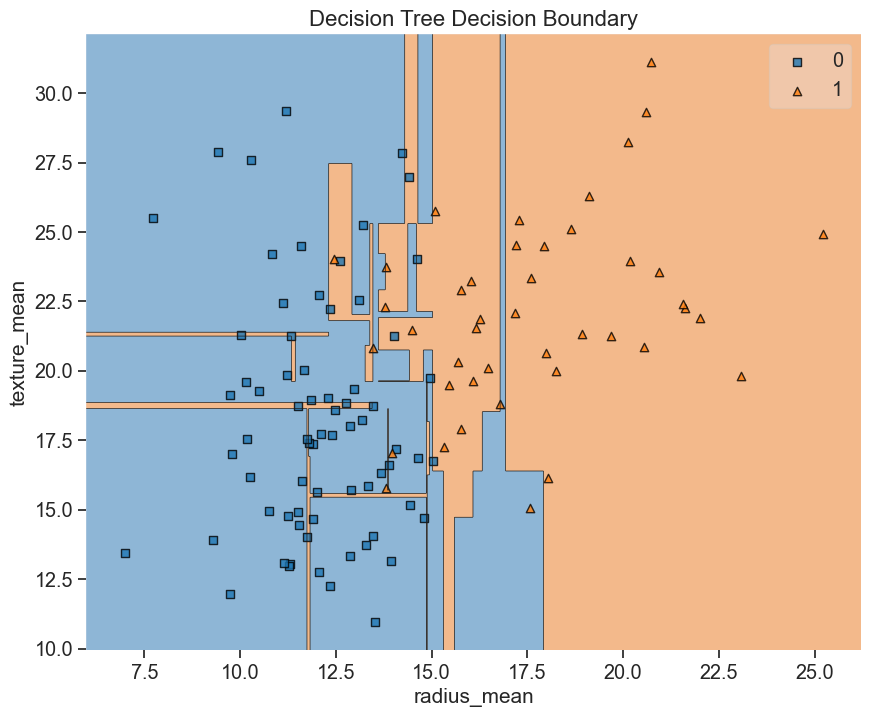

In [90]:
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

X_val_plot = X_val_plot.astype(np.float64)
y_val = y_val.astype(np.integer)


y_val_pred = decision_tree.predict(X_val_plot)

acc = accuracy_score(y_val, y_val_pred)

print(f"Validation Accuracy: {acc:.4f}")


plt.figure(figsize=(10, 8))
plot_decision_regions(X_val_plot, y_val, clf=decision_tree)
plt.xlabel('radius_mean', fontsize=15)
plt.ylabel('texture_mean', fontsize=15)
plt.title('Decision Tree Decision Boundary', fontsize=16)
plt.grid()
plt.show()


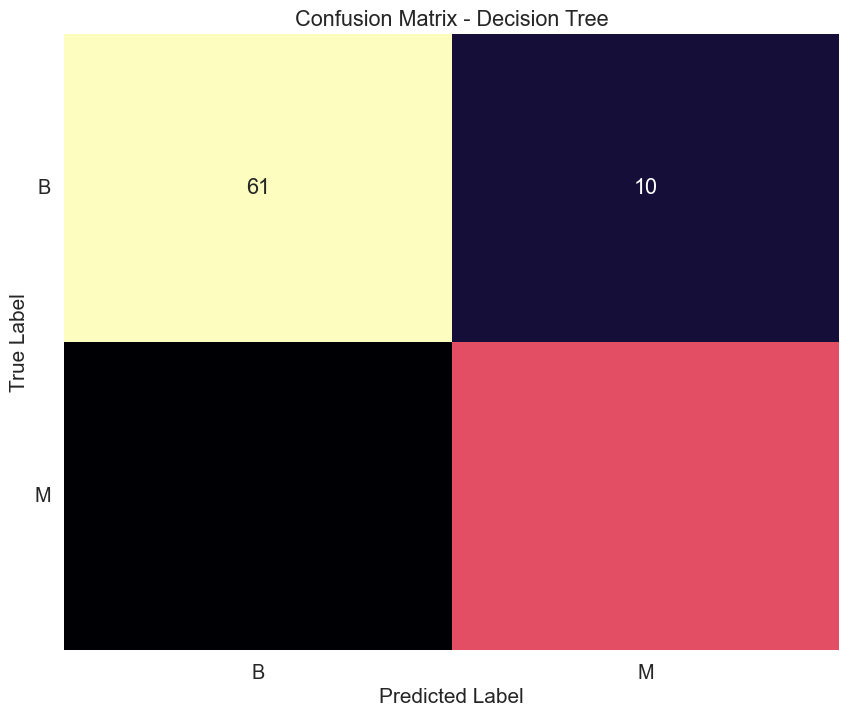

In [91]:
from sklearn import metrics
import seaborn as sns

test_pred_decision_tree = decision_tree.predict(X_val_plot)
confusion_matrix = metrics.confusion_matrix(y_val, test_pred_decision_tree)

matrix_df = pd.DataFrame(confusion_matrix)

plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot=True,
            fmt="g",
            ax=ax,
            cmap="magma",
            cbar=False)


ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_ylabel("True Label", fontsize=15)
ax.set_xticklabels(model_encoder.classes_)  
ax.set_yticklabels(model_encoder.classes_, rotation=0)

plt.show()

In [92]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_val_plot)

#Checking performance our model with classification report.
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.86      0.90        71
           1       0.80      0.91      0.85        43

    accuracy                           0.88       114
   macro avg       0.87      0.88      0.87       114
weighted avg       0.88      0.88      0.88       114



We can also implement a Regression algorithm with Decision Trees as shown in the code below.


In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y = True)

In [94]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 12)

reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [96]:
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

reg1 = DecisionTreeRegressor(max_depth=1)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.9328869622627052 

MSE reg2: 0.5363464016933671 

MSE reg1: 0.9328869622627053 

MSE reg2: 0.5253041480504745 

